# Exploratory Data Analysis

## 1.0 About author

- `Project:` Banking Customer Churn Prediction Dataset
- `Author:` Muhammad Waqas
- `Email:` waqasliaqat630@gmailcom
- [Linkedin](www.linkedin.com/in/muhammad-waqas-liaqat)
- [Github](https://github.com/waqas-liaqat)
- [kaggle](https://www.kaggle.com/muhammadwaqas630)

## 2.0 About Data

### 2.1 Metadata

- Data: Banking Customer Churn Prediction Dataset
- Data Age: Data was updated in April 2024.
- Data [link](https://www.kaggle.com/datasets/saurabhbadole/bank-customer-churn-prediction-dataset)

#### 2.1.1 Columns

- `RowNumber:` The sequential number assigned to each row in the dataset.

- `CustomerId:` A unique identifier for each customer.

- `Surname:` The surname of the customer.

- `CreditScore:` The credit score of the customer.

- `Geography:` The geographical location of the customer (e.g., country or region).

- `Gender:` The gender of the customer.

- `Age:` The age of the customer.

- `Tenure:` The number of years the customer has been with the bank.

- `Balance:` The account balance of the customer.

- `NumOfProducts:` The number of bank products the customer has.

- `HasCrCard:` Indicates whether the customer has a credit card (binary: yes/no).

- `IsActiveMember:` Indicates whether the customer is an active member (binary: yes/no).

- `EstimatedSalary:` The estimated salary of the customer.

- `Exited:` Indicates whether the customer has exited the bank (binary: yes/no).

### 2.2 Task:
We intend to conduct an Exploratory Data Analysis (EDA) on the given dataset. The EDA will serve as the basis for the necessary Data Wrangling activities to be carried out for the purposes of data cleaning and normalization. During the coding process, we will document our observations. Ultimately, we will produce a summary and draw conclusions from our findings.

### 2.3 Objective:
Reduce churn rates and identify customer behavior patterns.

## 3.0 Import Libraries

In [1]:
# For data manipulation
import pandas as pd
# For numerical computation
import numpy as np
# For Statistical Tests
from scipy.stats import chi2_contingency
# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Enable inline plotting for convenience within the Jupyter notebook
%matplotlib inline
# use case of warnings.filterwarnings('ignore') is to suppress warnings in order to prevent them from being displayed during the execution of your code.
import warnings
warnings.filterwarnings('ignore')

### 4.0 Data Loading, Exploration and Wrangling

#### 4.1 Data Loading

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

#### 4.2 Get sneak Peak of data

In [3]:
# first 5 rows
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# last 5 rows
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### 4.3 All Feature names

In [5]:
# All features
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### 4.4 Data Shape

In [6]:
# Shape of dataset
df.shape

(10000, 14)

### 4.5 Data Information

In [7]:
# Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Observation Set 1:**
- RowNumber, CustomerId and Surname are irrelevant for the analysis, so they need to be dropped.
- NumberOfProducts, Tenure, HasCrCard, IsActiveMember and Exited are categorical variables, and they need to be converted to tha format.

### 4.6 Missing Values

#### 4.6.1 Identifying missing values

In [8]:
# Features with no of null values in descending order
df.isnull().sum().sort_values(ascending=False)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

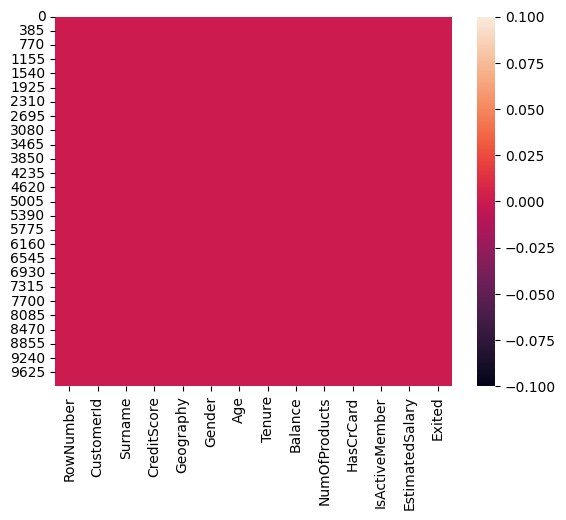

In [9]:
# Representation of null values graphically
sns.heatmap(df.isnull())

**Milestone 1:**
- As there is no missing value in the dataset, so we don't need to go forward toward missing value treatment.

### 4.7 Duplicates

In [10]:
# True if any duplicate found
df.duplicated().any()

False

In [11]:
df["CustomerId"].duplicated().any()

False

**Milestone 2:**
- No duplicate values are present in the dataset.

### 4.8 Feature Engineering

#### 4.8.1 Dropping Irrelevant Features

In [12]:
# Drops given features
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)

#### 4.8.2 Assignment of Relavent datatypes

In [13]:
# Assigns Relavent datatype
df[["HasCrCard","IsActiveMember", "Exited","NumOfProducts","Tenure"]]=df[["HasCrCard","IsActiveMember", "Exited","NumOfProducts","Tenure"]].astype("object", errors='raise')

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  object 
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  object 
 7   HasCrCard        10000 non-null  object 
 8   IsActiveMember   10000 non-null  object 
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 859.5+ KB


**Milestone 3:**
-  Relavent data type assigned to all features.

**Note:**
- The dataset has been successfully cleaned and is now suitable for subsequent analysis.

## 5.0 EDA (Exploratory Data Analysis) & Feature Engineering

### 5.1 Descriptive Summary

In [ ]:
# Gives statistical summary
df.describe()

,CreditScore,Age,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,76485.889288,100090.239881
std,96.653299,10.487806,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,11.580000
25%,584.000000,32.000000,0.000000,51002.110000
50%,652.000000,37.000000,97198.540000,100193.915000
75%,718.000000,44.000000,127644.240000,149388.247500
max,850.000000,92.000000,250898.090000,199992.480000


**Observation set 1:**
1. **Credit Score Distribution:** Fewer than 25% of customers have a poor credit score, indicating that the majority maintain an acceptable or better credit standing.
2. **Age Demographics:** 75% of the customer base is aged 45 years or younger, suggesting a predominantly younger clientele.
3. **Tenure with the Bank:**
   - 50% of customers have been associated with the bank for 5 years or less.
   - 75% of customers have a tenure of 7 years or less, with a longer tenure being less common.
4. **Account Balance:** 25% of customers have empty accounts, which may reflect inactivity or specific financial behavior among a subset of the customer base.
5. **Product Subscription:** 50% of customers are subscribed to only one product, highlighting a tendency for single-product engagement.

### 5.2 Univariate and Multivariate Analysis

**Exited**

In [17]:
# percentage of each category in Exited
churn_ratio = df["Exited"].value_counts(normalize=True) * 100
churn_ratio

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

Text(0, 0.5, '')

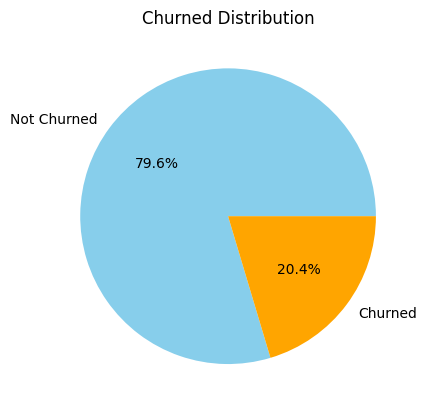

In [ ]:
# Pie plot shows distribution
df["Exited"].value_counts().plot(kind="pie", autopct="%1.1f%%", labels=["Not Churned", "Churned"], colors=['skyblue', 'orange'])
plt.title("Churned Distribution")
plt.ylabel("")

**CreditScore**

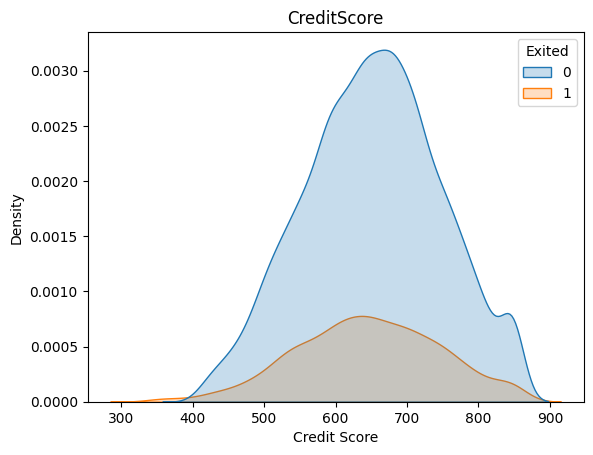

In [19]:
sns.kdeplot(data=df, x="CreditScore", hue="Exited", fill=True)
plt.title("CreditScore")
plt.xlabel("Credit Score")
plt.ylabel("Density")
plt.show()

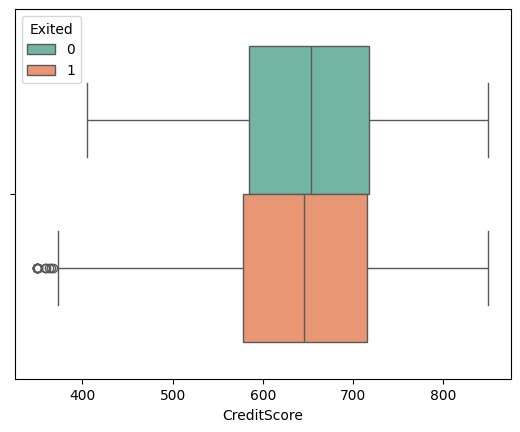

In [20]:
sns.boxplot(data=df,x="CreditScore", hue="Exited",orient="h", palette="Set2")
plt.show()

In [21]:
df[(df["CreditScore"]<300) | (df["CreditScore"]>850)]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**Geography**

In [22]:
df.groupby(["Geography", "Exited"])["Geography"].value_counts()

Geography  Exited
France     0         4204
           1          810
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: count, dtype: int64

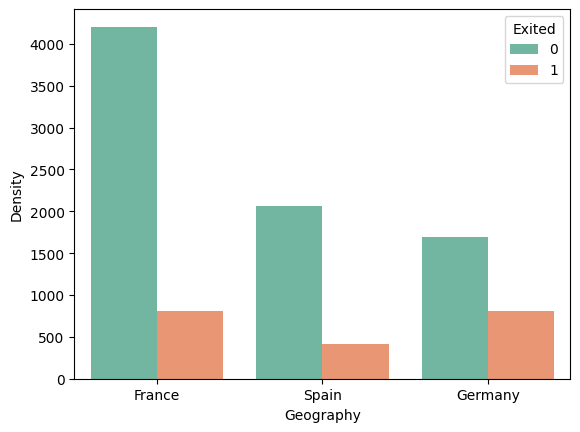

In [23]:
sns.countplot(data=df,x="Geography", hue="Exited",orient="h", palette="Set2")
plt.xlabel("Geography")
plt.ylabel("Density")
plt.show()

**Gender**

In [24]:
100*(df.groupby(["Gender"])["Gender"].value_counts()/len(df))

Gender
Female    45.43
Male      54.57
Name: count, dtype: float64

In [25]:
100*(df.groupby(["Gender", "Exited"])["Gender"].value_counts()/len(df))

Gender  Exited
Female  0         34.04
        1         11.39
Male    0         45.59
        1          8.98
Name: count, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

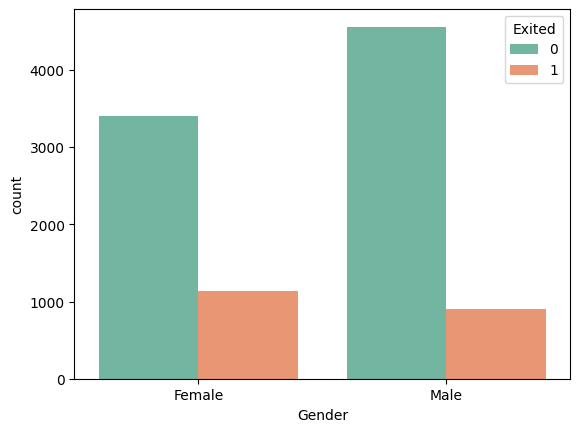

In [26]:
sns.countplot(df,x="Gender", hue="Exited", palette="Set2")

**Age**

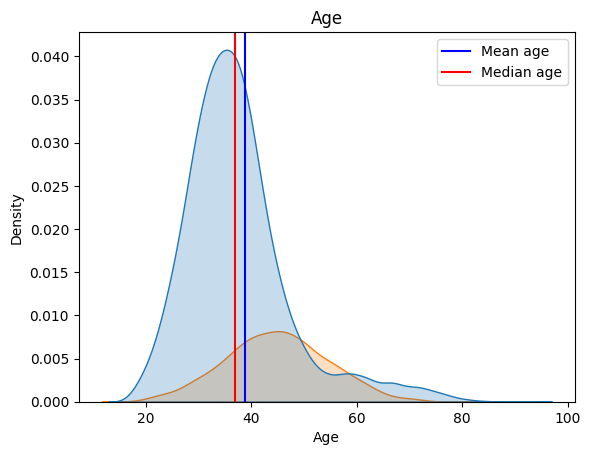

In [27]:
sns.kdeplot(data=df, x="Age", hue="Exited", fill='True')
plt.axvline(df["Age"].mean(), color='blue' , label="Mean age")
plt.axvline(df["Age"].median(), color='red' , label="Median age")
plt.title("Age")
plt.legend()

<Axes: xlabel='Age'>

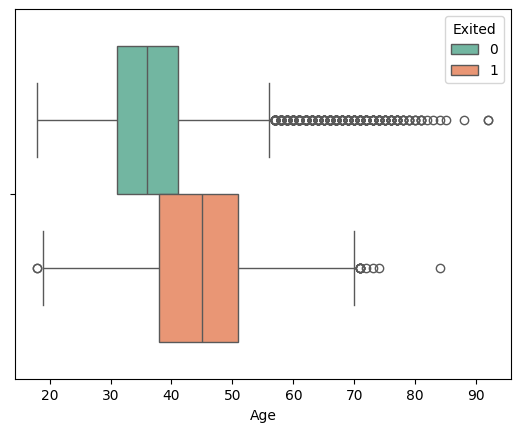

In [28]:
sns.boxplot(data=df,x="Age", hue="Exited",orient="h", palette="Set2")

In [29]:
bins=[17,30,45,60,df["Age"].max()]
labels=["18-30","31-45","46-60","61+"]
df["AgeGroups"]=pd.cut(df["Age"],labels=labels,bins=bins)

In [30]:
df["AgeGroups"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: AgeGroups
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


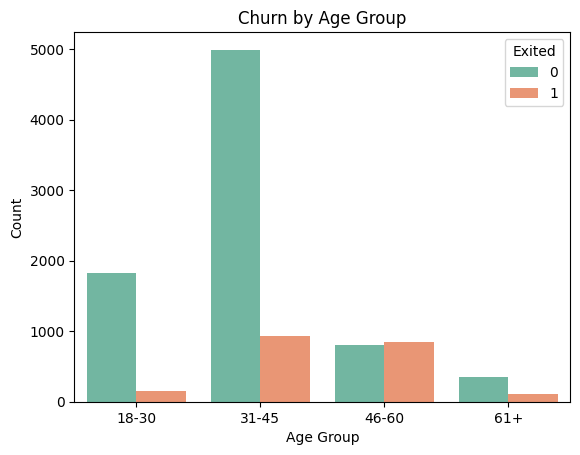

In [31]:
# Visualize age group vs churn
sns.countplot(data=df, x="AgeGroups", hue="Exited", palette="Set2")
plt.title("Churn by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

**Tenure**

In [32]:
100*(df.groupby(["Tenure", "Exited"])["Tenure"].value_counts()/len(df))

Tenure  Exited
0       0         3.18
        1         0.95
1       0         8.03
        1         2.32
2       0         8.47
        1         2.01
3       0         7.96
        1         2.13
4       0         7.86
        1         2.03
5       0         8.03
        1         2.09
6       0         7.71
        1         1.96
7       0         8.51
        1         1.77
8       0         8.28
        1         1.97
9       0         7.71
        1         2.13
10      0         3.89
        1         1.01
Name: count, dtype: float64

<Axes: xlabel='Tenure', ylabel='count'>

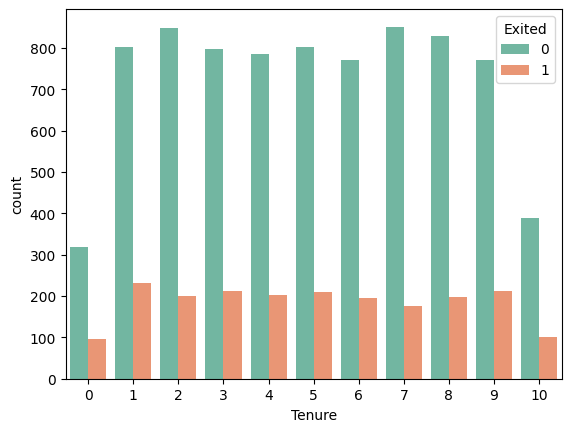

In [33]:
sns.countplot(data=df,x="Tenure", hue="Exited",orient="h", palette="Set2")

**Balance**

Text(0.5, 1.0, 'Balance')

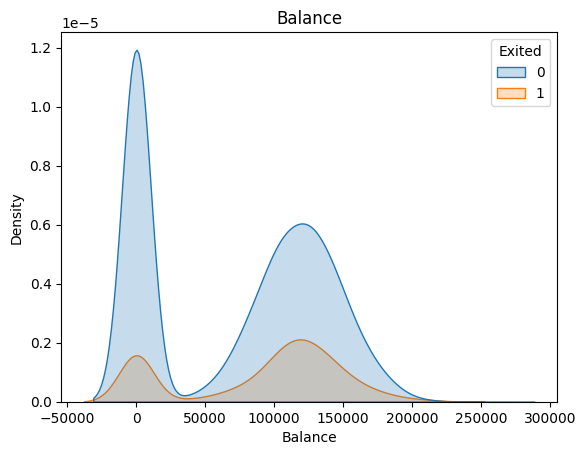

In [34]:
sns.kdeplot(data=df, x="Balance", hue="Exited", fill='True')
plt.title("Balance")

<Axes: xlabel='Balance'>

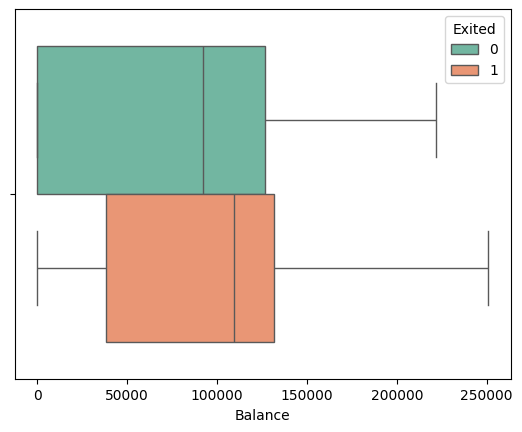

In [35]:
sns.boxplot(data=df,x="Balance", hue="Exited",orient="h", palette="Set2")

In [36]:
balance_bins = [-1, 0, 50000, 100000, 150000, df["Balance"].max()]
balance_labels = ["No Balance", "<50k", "50k-100k", "100k-150k", ">150k"]
df["BalanceCategory"] = pd.cut(df["Balance"], bins=balance_bins, labels=balance_labels)

In [37]:
df["BalanceCategory"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: BalanceCategory
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


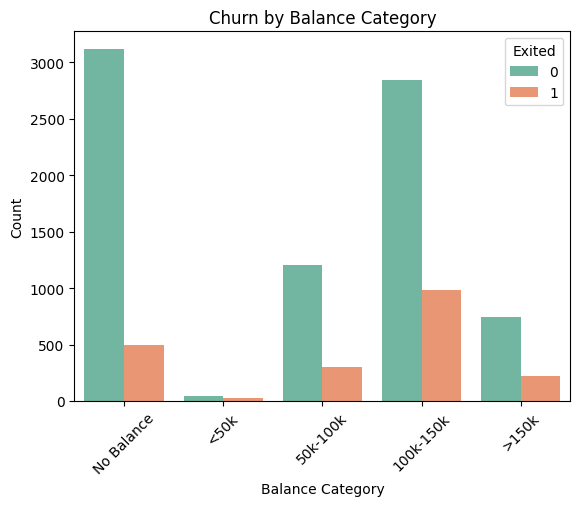

In [38]:
sns.countplot(data=df, x="BalanceCategory", hue="Exited", palette="Set2")
plt.title("Churn by Balance Category")
plt.xlabel("Balance Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**NumOfProducts**

In [39]:
df.groupby(["NumOfProducts", "Exited"])["NumOfProducts"].value_counts()

NumOfProducts  Exited
1              0         3675
               1         1409
2              0         4242
               1          348
3              0           46
               1          220
4              1           60
Name: count, dtype: int64

In [40]:
100*(df.groupby(["NumOfProducts", "Exited"])["NumOfProducts"].value_counts()/len(df))

NumOfProducts  Exited
1              0         36.75
               1         14.09
2              0         42.42
               1          3.48
3              0          0.46
               1          2.20
4              1          0.60
Name: count, dtype: float64

<Axes: xlabel='NumOfProducts', ylabel='count'>

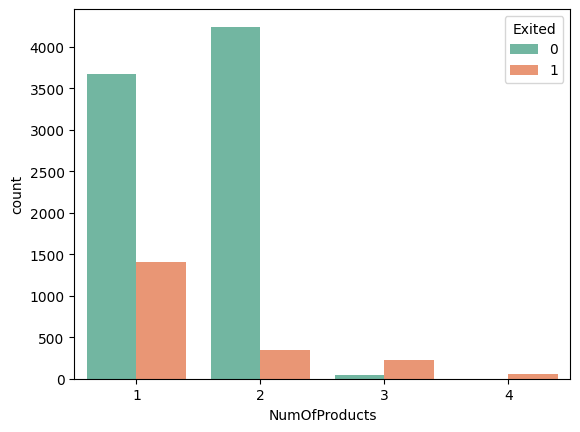

In [41]:
sns.countplot(data=df,x="NumOfProducts", hue="Exited",orient="h", palette="Set2")

**HasCrCard**

In [42]:
df.groupby(["HasCrCard", "Exited"])["HasCrCard"].value_counts()

HasCrCard  Exited
0          0         2332
           1          613
1          0         5631
           1         1424
Name: count, dtype: int64

In [43]:
100*(df.groupby(["HasCrCard", "Exited"])["HasCrCard"].value_counts()/len(df))

HasCrCard  Exited
0          0         23.32
           1          6.13
1          0         56.31
           1         14.24
Name: count, dtype: float64

<Axes: xlabel='HasCrCard', ylabel='count'>

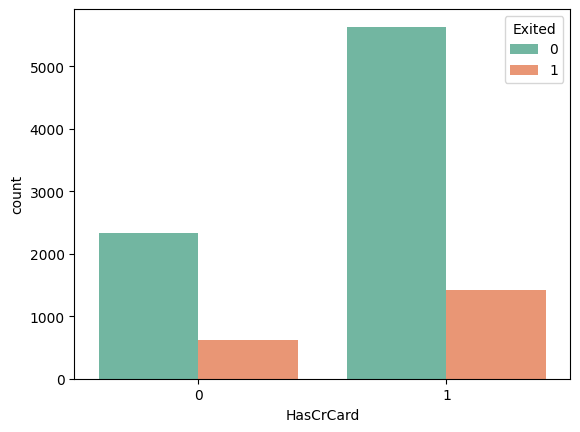

In [44]:
sns.countplot(data=df,x="HasCrCard", hue="Exited",orient="h", palette="Set2")

**IsActiveMember**

In [45]:
100*(df.groupby(["IsActiveMember", "Exited"])["IsActiveMember"].value_counts()/len(df))

IsActiveMember  Exited
0               0         35.47
                1         13.02
1               0         44.16
                1          7.35
Name: count, dtype: float64

<Axes: xlabel='IsActiveMember', ylabel='count'>

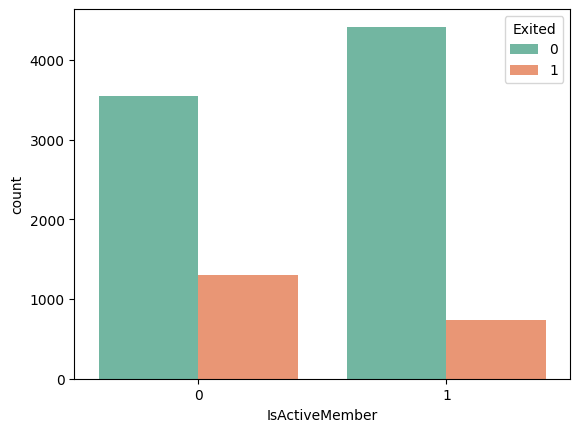

In [46]:
sns.countplot(data=df,x="IsActiveMember", hue="Exited",orient="h", palette="Set2")

**EstimatedSalary**

Text(0.5, 1.0, 'EstimatedSalary')

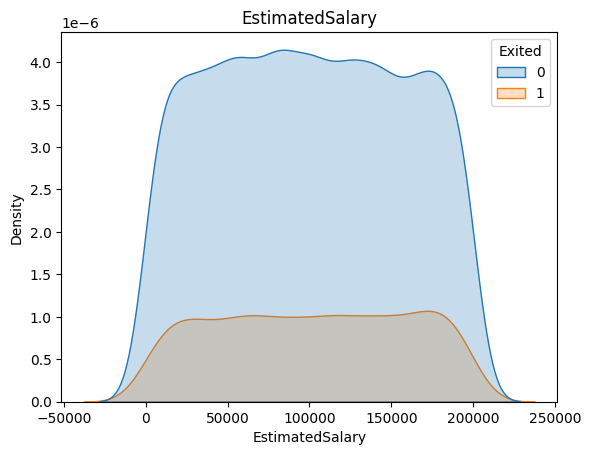

In [47]:
sns.kdeplot(data=df, x="EstimatedSalary", hue="Exited", fill='True')
plt.title("EstimatedSalary")

<Axes: xlabel='EstimatedSalary'>

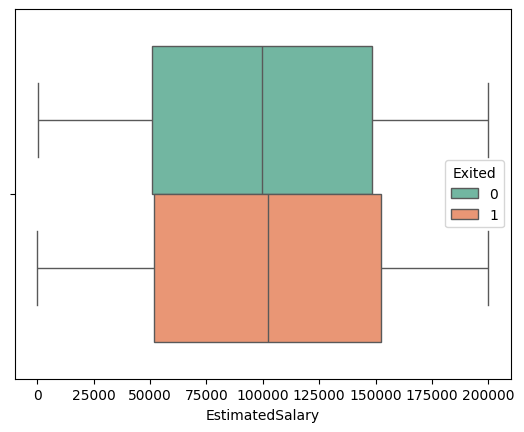

In [48]:
sns.boxplot(data=df,x="EstimatedSalary", hue="Exited",orient="h", palette="Set2")

**All Numerical Variables**

<Axes: >

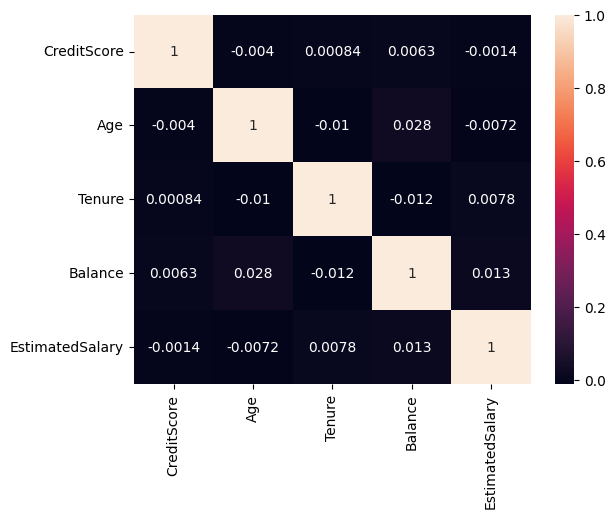

In [49]:
sns.heatmap(df[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]].corr(), annot=True)

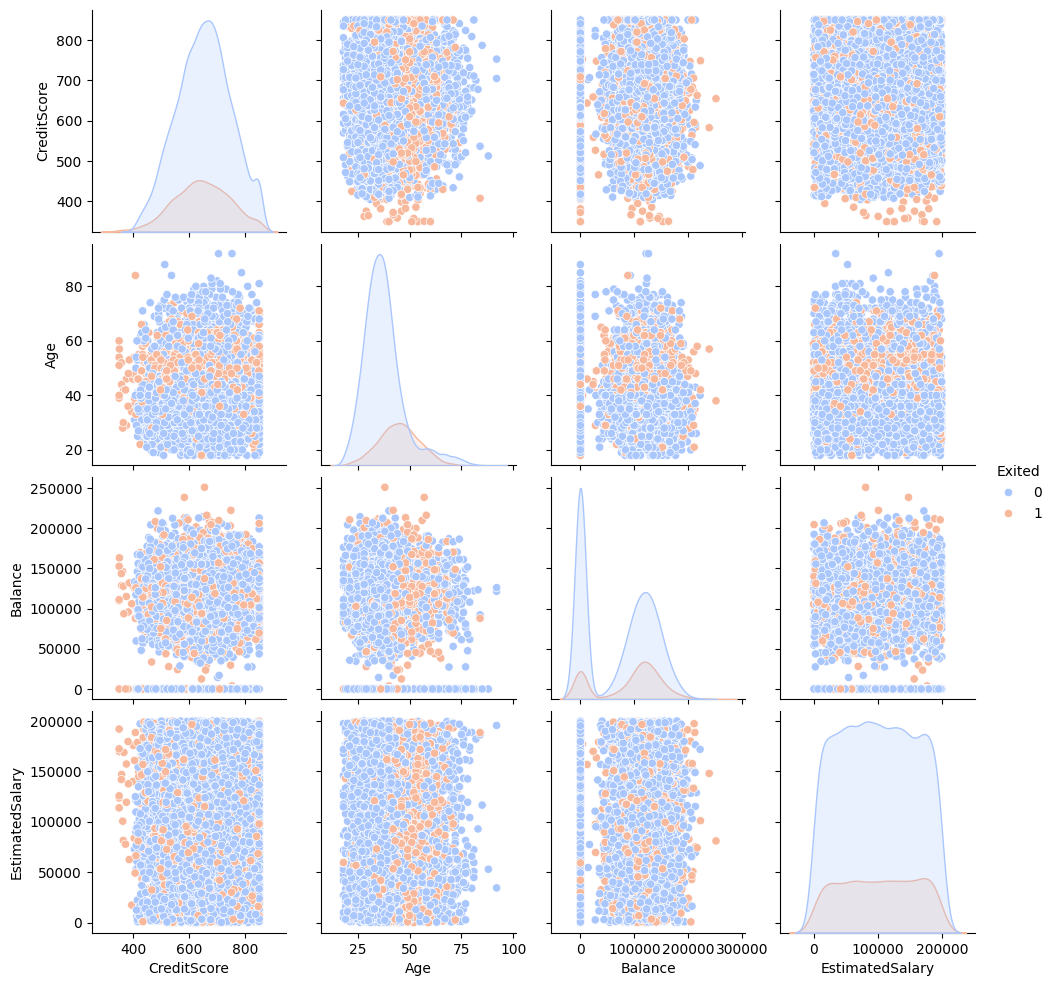

In [50]:
sns.pairplot(df, vars=["CreditScore", "Age", "Balance", "EstimatedSalary"], hue="Exited", palette="coolwarm")
plt.show()


**Credit Score vs Geography**

<Axes: xlabel='CreditScore'>

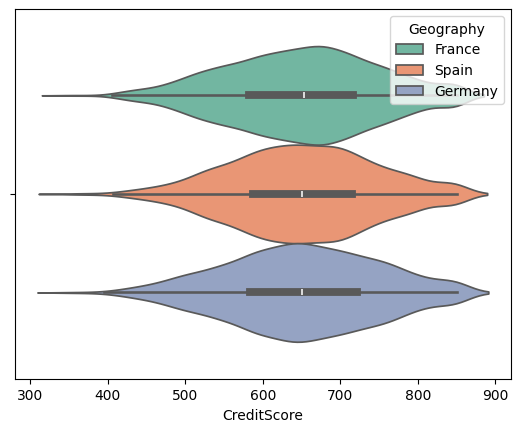

In [51]:
sns.violinplot(df,x="CreditScore", hue="Geography", palette="Set2")

<Axes: xlabel='CreditScore', ylabel='Density'>

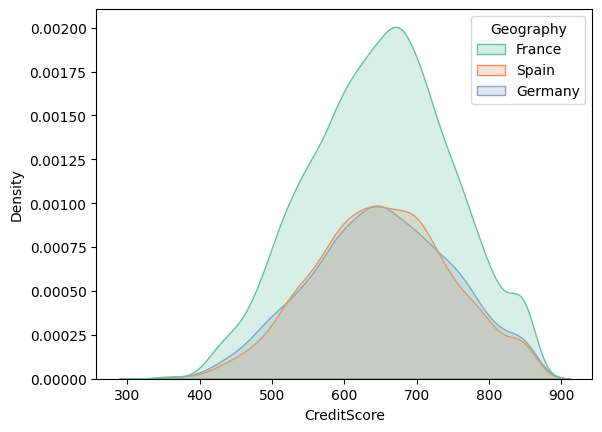

In [52]:
sns.kdeplot(df,x="CreditScore", hue="Geography", palette="Set2", fill=True)

**Geography vs Age**

In [53]:
(df.groupby("Geography")["Age"].mean())

Geography
France     38.511767
Germany    39.771622
Spain      38.890997
Name: Age, dtype: float64

<Axes: xlabel='Geography'>

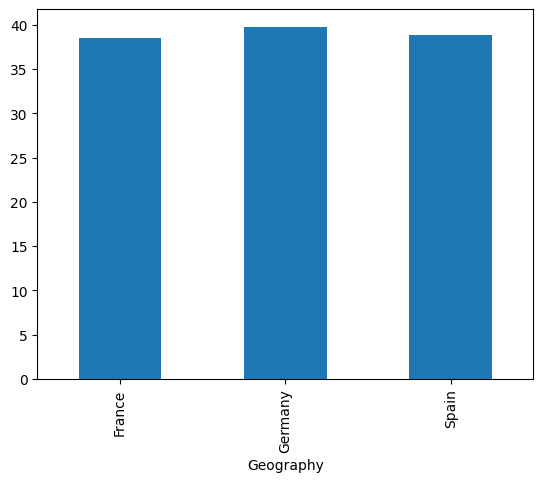

In [54]:
(df.groupby("Geography")["Age"].mean()).plot(kind="bar")

**Geography vs Gender**

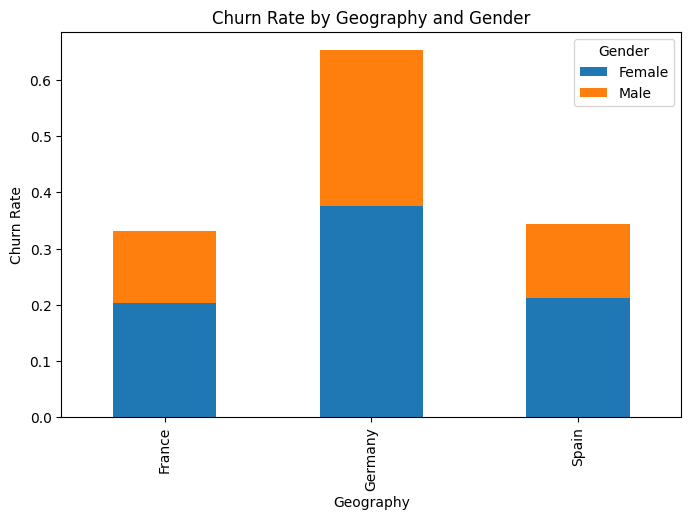

In [55]:
# Combined analysis of Geography and Gender
pd.crosstab(index=df["Geography"], columns=df["Gender"], values=df["Exited"], aggfunc="mean").plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Churn Rate by Geography and Gender")
plt.ylabel("Churn Rate")
plt.show()

**Observation Set 3:**
- **Exited**
    - Data is highly imbalanced, Ratio 79:21.
    - 79% of the customers are not churned.
    - To avoid overfitting and biasness of model we need to address this, through best suitable imbalance data handeling technique.
- **CreditScore**
    - Customers with lowest credit scores have more chances to churn.
    - All data points exhibit a Credit Score within the valid and expected range, indicating data integrity and accuracy.
- **Geography**
    - Germany have more raio of customers churning(almost 50%).
- **Gender**
    - Female churns more than male.
- **Age**
    - Younger customers are less likely to churn.
    - Churn Ratio is unusually high in age group 46-60.
- **Tenure**
    - It seems that tenure don't effect churn rate very much.
- **Balance**
    - Out of the Customers with low balance a significant ratio of individuals choosed to stay.
    - It seems churn rate increases with balance.
- **NumOfProducts**
    - Customers using two services are less likely to churn
    - Churner rate as compared to non-churners is too high in customers using 3 services.
    - 100% people churned in case of all 4 services.
- **IsActiveMember**
    - Inactive members are more likely to churn and vice versa.
- No correlation found between any of the numerical variables.

In [56]:
# df.to_csv("cleaned_data.csv", index=False)

## 6.0 Statistical Tests

### 6.1 Chi2_Contigency

- Using Chi-Square tests, we will evaluate the statistical significance of our assumptions regarding the relationships of categorical features with exited.

In [57]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'AgeGroups', 'BalanceCategory'],
      dtype='object')

- H0: Both are independent.
- H1: Both are dependent.

In [58]:
expected_relational=["Geography", "Gender", "NumOfProducts", "IsActiveMember","AgeGroups","BalanceCategory"]
for col in expected_relational:
    contigency_table=pd.crosstab(df[col],df["Exited"])
    chi2,p,dof,expected=chi2_contingency(contigency_table)
    if p<0.05:
        print(f"yes, {col} and Exited are dependent.")
    elif p>0.05:
        print(f"Both {col} and Exited are independent.")

yes, Geography and Exited are dependent.
yes, Gender and Exited are dependent.
yes, NumOfProducts and Exited are dependent.
yes, IsActiveMember and Exited are dependent.
yes, AgeGroups and Exited are dependent.
yes, BalanceCategory and Exited are dependent.


- 🥳My Assumptions were right, All these features effects Customer churning.


## 7.0 Actionable Business Strategies

1. **Target High-Risk Customers:**
- `Finding:` Germany and female customers have the highest churn rate.
- `Actionable Strategy:` Develop targeted retention campaigns for these customers. These campaigns can include personalized offers, loyalty programs, or exclusive financial products.

2. **Focus on Customers Aged 46–60:**
- `Finding:` The churn ratio is unusually high in this age group, indicating dissatisfaction or unmet needs.
- `Actionable Strategy:` Design age-specific engagement strategies, such as offering tailored products like retirement planning or financial advisory services.

3. **Encourage Inactive Members:**
- `Finding:` Inactive members are more likely to churn than active members.
- `Actionable Strategy:` Implement campaigns to re-engage inactive members, such as personalized emails or app notifications offering rewards or incentives for account activity.
4. **Address more-Product Users:**
- `Finding:` Customers with more products are more likely to churn.
- `Actionable Strategy:` Try to improve services in less purchased services.

5. **Retain Customers with High Balances:**
- `Finding:` Customers with high balances are more likely to churn and represent valuable assets.
- `Actionable Strategy:` Create premium service tiers or offer financial benefits (e.g., reduced fees, priority services) to retain high-balance customers.

6. **Prioritize Customers with Declining Credit Scores:**
- `Finding:` Lower credit scores are associated with higher churn rates.
- `Actionable Strategy:` Offer financial education programs or credit score improvement tools to support these customers and reduce churn risk.

## 8.0 Contact Details

Click on link below to contact/follow/correct me:
- `Email:` waqasliaqat630@gmailcom
- [Linkedin](www.linkedin.com/in/muhammad-waqas-liaqat)
- [Github](https://github.com/waqas-liaqat)
- [kaggle](https://www.kaggle.com/muhammadwaqas630)
